## Part II - ProsperLoanData Insights.
### by Iwuoha Joshua

## Investigation Overview

> The main focus will be on the loan status and original loan amount, where i will attempt to describe the factors that affect them and to what extent. What exactly is the main indicator on a customer's ability to repay a loan? I have answered this by looking at the relationship between the debt to income ratio and the loan status, and from the plot, discovered that the lower the debt to income ratio, the more likely a customer will repay their debt. The second question would be What essentially determines the amount of loan a customer has access to? And to understand this, i have looked at the relationship between the original loan amount and income range as well as the relationship between the original loan amount and prosperscore.

## Dataset Overview

> The dataset contains 11397 rows and 81 columns all with information on the loan details of each customer.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

In [4]:
#Extract columns to explore
df = df[['Term', 'LoanStatus','ProsperScore','EmploymentStatus','EmploymentStatusDuration','DebtToIncomeRatio', 'IncomeRange','MonthlyLoanPayment','LoanOriginalAmount','BorrowerAPR','StatedMonthlyIncome','LoanMonthsSinceOrigination']]

According to the data dictionary, the ProsperScore which is a custom risk score ranges from 1 - 10 with 10 being the best or lowest risk. But as can be seen here there is an 11 in the dataset. I am going to assume that this was a 1 mistakenly inputted as an 11. While exploring further, this might turn out to be a 10 mistakenly inputted as an 11.

In [5]:
#The ProsperScore in ordinal in nature and to avoid it being plotted as a regular number, I've assigned it the string data type.
df.ProsperScore.replace('11.0','1.0',inplace = True) 
df.ProsperScore = df.ProsperScore.apply(lambda x:'{}'.format(x))

In [6]:
#converting 'IncomeRange','ProsperScore' from a plain object tyoe into an ordered categorical type.
order = {'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not employed','Not displayed'],
         'ProsperScore':['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0'],
         'LoanStatus':['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)',
                       'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)',
                       'Past Due (91-120 days)','FinalPaymentInProgress']}
         
                        
                        
for i in order:
    my_order = pd.api.types.CategoricalDtype(ordered = True, categories = order[i])
    df[i] = df[i].astype(my_order)

In [7]:
base_color = sb.color_palette()[0]
def bins(low,high,space): 
    return 10**np.arange(low,high+space,space)
#return an ordered list 
def order(dataframe,x): 
    return dataframe[x].value_counts().index

## Loan Status Distribution

> The majority of the customers are still repaying their debt, few have defaulted and quite a lot have paid back completely. As for the rest of the categories, there are very few observations.

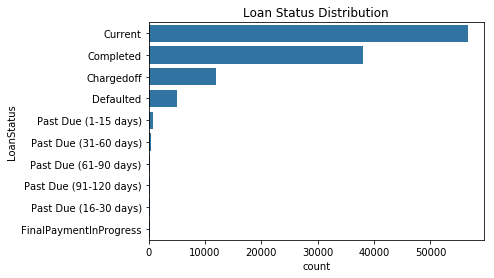

In [8]:
hide_code_in_slideshow()
sb.countplot(data = df, y = 'LoanStatus',color = base_color,order = order(df,'LoanStatus'))
plt.title('Loan Status Distribution');

## Debt to Income Ratio Distribution.

> The chart is unimodal with a peak between 0.2 - 0.3. The histogram followed the expected pattern as there are fewer loans for the higher debt-to-income ratios, as we see the drop in the chart from 0.4. A lower debt-to-income ratio means a stroger ability to payback the loan amount, and we can see that more customers with a strong income base in proprtion to the loan amount taken were given the loan.

In [9]:
#eliminate nan values to enable histogrm ploting of the DebtToIncomeRatio
new = df[df.DebtToIncomeRatio.isnull() == False]

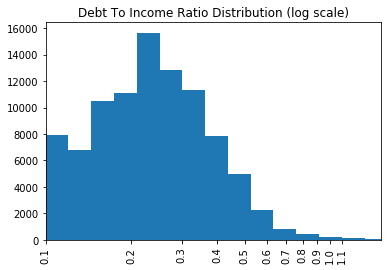

In [10]:
hide_code_in_slideshow()
ticks = np.arange(0.1,1.2,0.1) 
label = ['{:.1f}'.format(v) for v in ticks]
plt.hist(x = new.DebtToIncomeRatio, bins = bins(-1,1.2,0.08))
plt.title('Debt To Income Ratio Distribution (log scale)')
plt.xscale('log') 
plt.xlim(0,1.5) 
plt.xticks(ticks,label,rotation = 90);

## Loan Status and Debt To Income Ratio Comparison.

> A spotlight on the Defaulted and chargedoff variable, and we can see that it confirms the pattern observed in the univariate exploration of the DebtToIncomeRatio where we observed that there where a lesser count of loans given to customers with a hight debt to income ratio. Here we observe that the average debtbto income ratio for those who defaulted or whose loans were chargedoff were the highest. The average for those who have repaid or are about to make final payment on their loan is far less, indicating that the debttoincomeratio variable is a strong indicator of whether or not a customer will default on a loan.

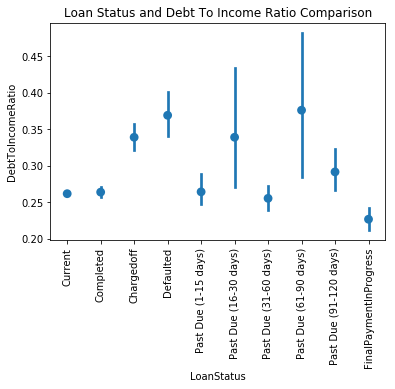

In [11]:
hide_code_in_slideshow()
sb.pointplot(data = df, x = 'LoanStatus',y = 'DebtToIncomeRatio',linestyles = '') 
plt.xticks(rotation = 90)
plt.title('Loan Status and Debt To Income Ratio Comparison');

## Original Loan Amount Distribution.

> There are three peaks in the histogram,between the 3500 - 4000,9000 - 10000,and around 11,000 - 12,000,in the order in which they appear on the chart. These appear to be the loan amounts that're most frequently requested.

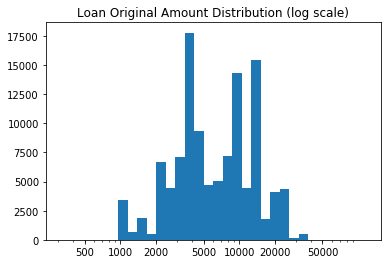

In [12]:
hide_code_in_slideshow()
ticks = [500,1000,2000,5000,10000,20000,50000] 
label = ['{}'.format(v) for v in ticks]
plt.hist(x=df.LoanOriginalAmount,bins = bins(2.5,5,0.08)) 
plt.xscale('log')
plt.title('Loan Original Amount Distribution (log scale)')
plt.xticks(ticks,label);

## Income Range Distribution.

> Most are in the 25000−49,999𝑟𝑎𝑛𝑔𝑒𝑎𝑛𝑑 50,000 - 74,999 range. During Further exploration, we'll investigate how this affects how much loan they have access to as well as their ability to repay.

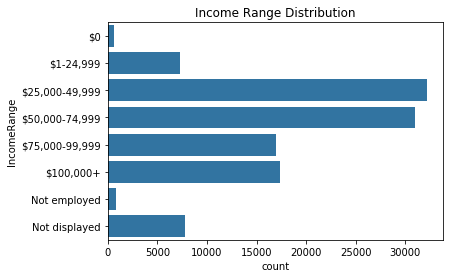

In [13]:
hide_code_in_slideshow()
sb.countplot(data = df, y = 'IncomeRange', color = base_color)
plt.title('Income Range Distribution');

## Loan Original Amount vs Income Range.

> There is an inconsistency in the data as the mean loan amount for borrowers that declared a zero dollar income is surprisingly as high as 7000. Other than that, the pattern for the other categories follow the expected intuition that the mean loan amount would rise as the income bracket gets higher and fall for those that are not employed as they are less likely to repay the loan. Interesting to note is the fact that those who did not indicate their income range had access to a relatively low loan amount.

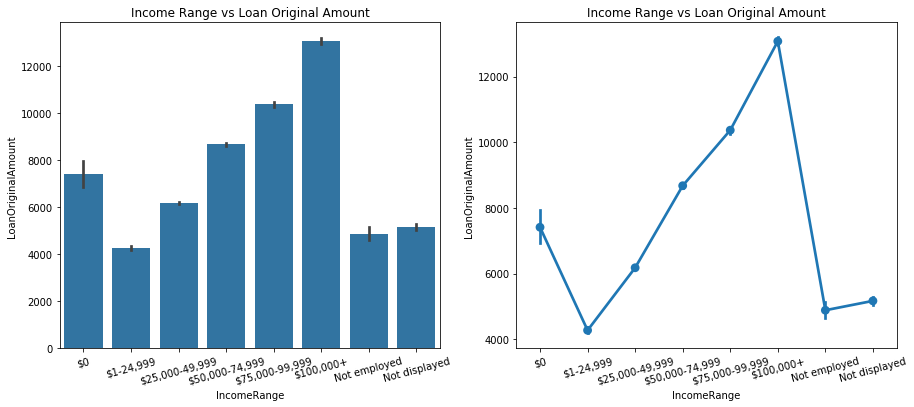

In [14]:
hide_code_in_slideshow()
fig = plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sb.barplot(data = df, x = 'IncomeRange',y = 'LoanOriginalAmount',color = base_color); 
plt.xticks(rotation = 15)
plt.title('Income Range vs Loan Original Amount')
plt.subplot(1,2,2) 
sb.pointplot(data = df, x = 'IncomeRange',y = 'LoanOriginalAmount') 
plt.xticks(rotation = 15)
plt.title('Income Range vs Loan Original Amount');

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 421674 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 